C:\Users\ScarboroC\AppData\Local\Temp\ipykernel_6300\167899605.py:7: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


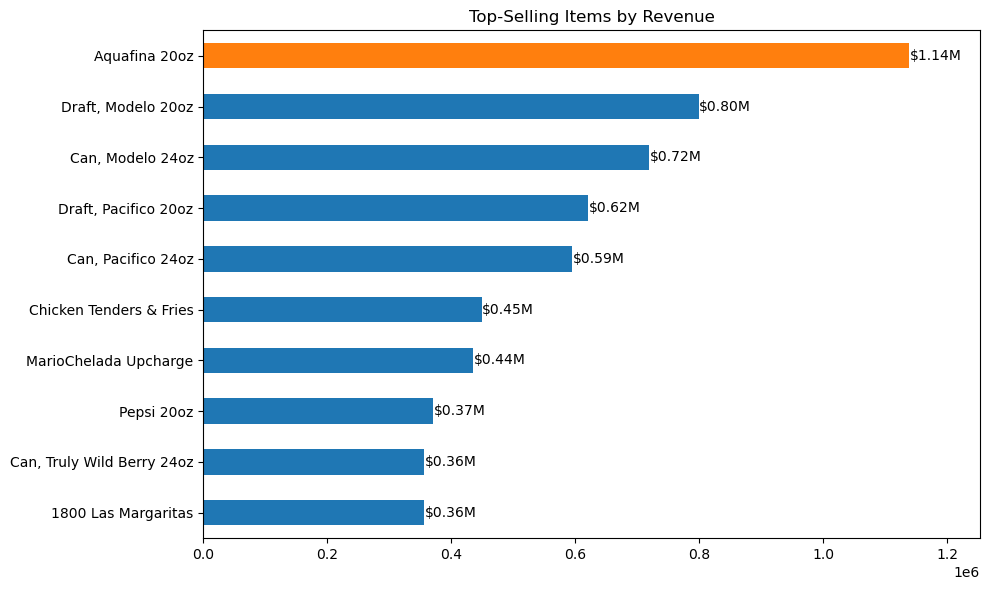

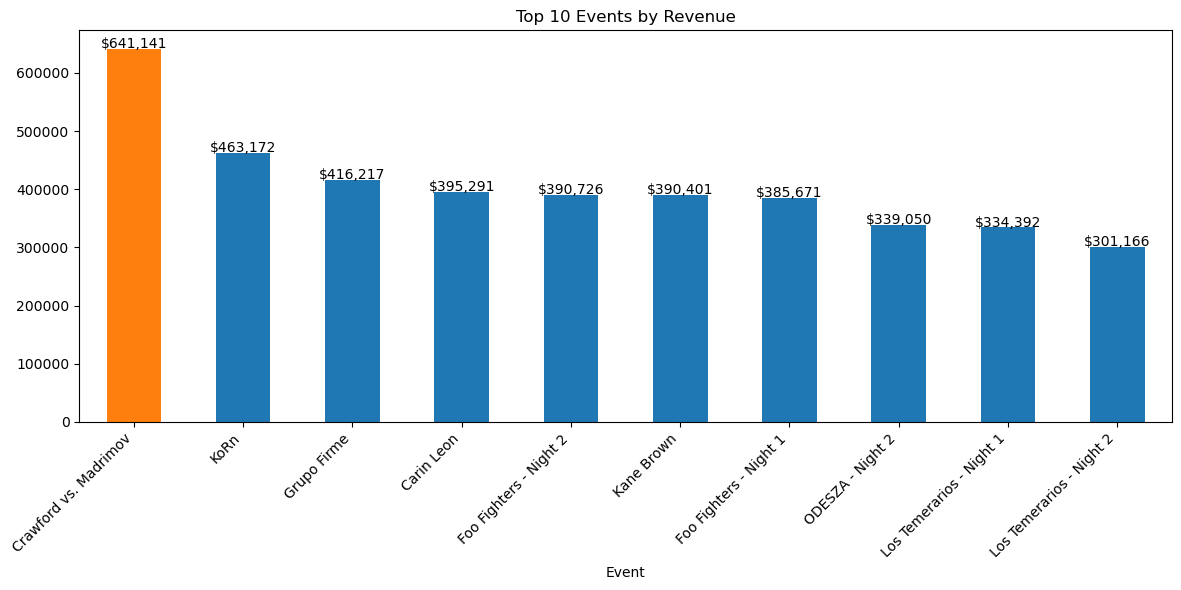

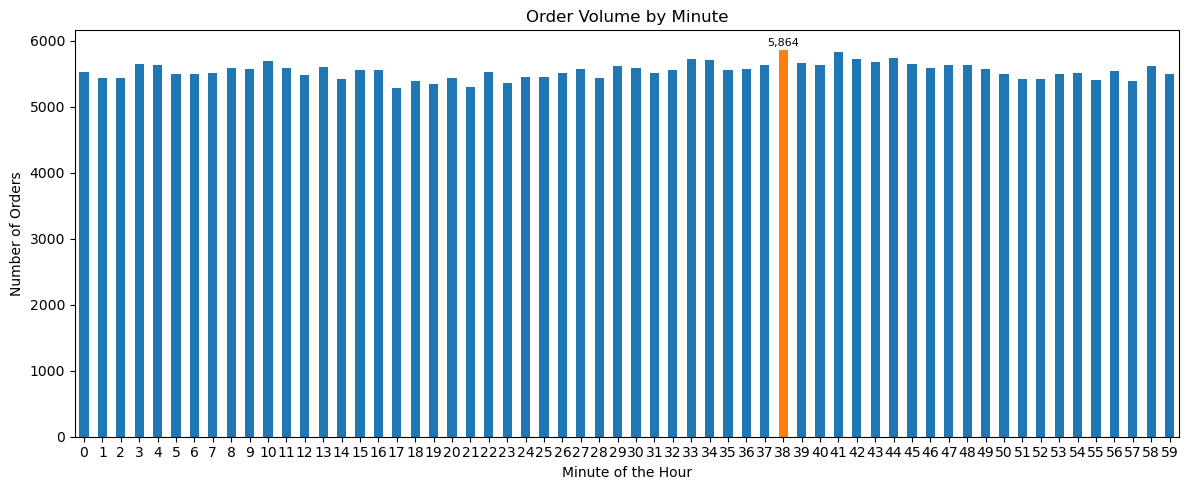

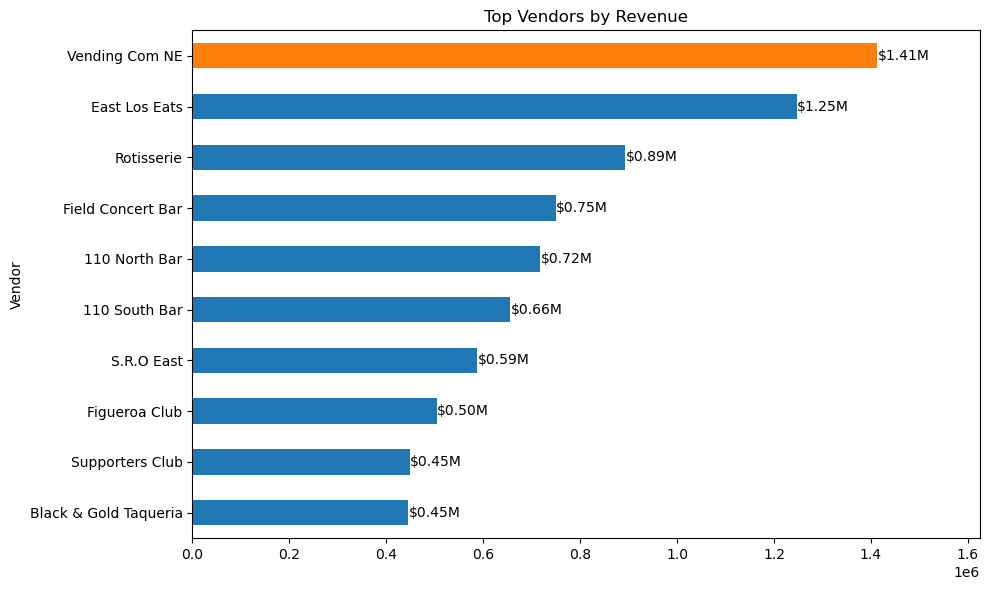

PDF saved to: C:\Users\ScarboroC\Documents\lafc_visuals.pdf


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages 

# Load the cleaned dataset
file_path = r"C:\Users\ScarboroC\OneDrive - Pittsburgh Steelers\Documents\lafc_cleaned_data.csv"
df = pd.read_csv(file_path)


# Initialize PDF
pdf_path = r"C:\Users\ScarboroC\Documents\lafc_visuals.pdf"
pdf = PdfPages(pdf_path)

#  Top-Selling Items 
top_items = df.groupby("name")["total"].sum().sort_values(ascending=False).head(10)
colors = ['#1f77b4'] * 10
colors[0] = '#ff7f0e'  # Highlight the top bar
plt.figure(figsize=(10, 6))
top_items.plot(kind="barh", color=colors)
for i, v in enumerate(top_items):
    plt.text(v + 1000, i, f"${v/1e6:.2f}M", va='center')
    plt.xlim(0, max(top_items) * 1.1)  # or max(top_vendors) * 1.1
plt.title("Top-Selling Items by Revenue")
plt.xlabel("")
plt.ylabel("")
plt.gca().invert_yaxis()
plt.tight_layout()
pdf.savefig(plt.gcf())  # Save to PDF
plt.show()

# Revenue by Event 
top_events = df.groupby("event_name")["total"].sum().sort_values(ascending=False).head(10)
colors = ['#1f77b4'] * 10
colors[0] = '#ff7f0e'
plt.figure(figsize=(12, 6))
top_events.plot(kind="bar", color=colors)
for i, v in enumerate(top_events):
    plt.text(i, v + 1000, f"${v:,.0f}", ha='center')
plt.title("Top 10 Events by Revenue")
plt.xlabel("Event")
plt.ylabel("")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
pdf.savefig()
plt.show()

#  Peak Ordering Times by Minute 
minute_counts = df.groupby("minute")["order_id"].count()
peak_minute = minute_counts.idxmax()
colors = ['#1f77b4' if i != peak_minute else '#ff7f0e' for i in minute_counts.index]
plt.figure(figsize=(12, 5))
minute_counts.plot(kind="bar", color=colors)
for i, (minute, v) in enumerate(minute_counts.items()):
    if minute == peak_minute:
        plt.text(i, v + 50, f"{v:,}", ha='center', fontsize=8)
plt.title("Order Volume by Minute")
plt.xlabel("Minute of the Hour")
plt.ylabel("Number of Orders")
plt.xticks(rotation=0)
plt.tight_layout()
pdf.savefig()
plt.show()

# Top Vendors by Revenue 
top_vendors = df.groupby("vendor_name")["total"].sum().sort_values(ascending=False).head(10)
colors = ['#1f77b4'] * 10
colors[0] = '#ff7f0e'
plt.figure(figsize=(10, 6))
top_vendors.plot(kind="barh", color=colors)
for i, v in enumerate(top_vendors):
    plt.text(v + 1000, i, f"${v/1e6:.2f}M", va='center')
    ax = plt.gca()
x_max = top_vendors.max()
ax.set_xlim(0, x_max * 1.15)  # Add extra space

plt.title("Top Vendors by Revenue")
plt.xlabel("")
plt.ylabel("Vendor")
plt.gca().invert_yaxis()
plt.tight_layout()
pdf.savefig()
plt.show()

print(f"PDF saved to: {pdf_path}")
pdf.close()